# Revealing TCR3b sequence motifs for a specific epitope using attention weights

- Attention 분석을 통해 특정 epitope을 인지하는 TCRb CDR3 서열 모티프를 확인한다

## Global configurations

In [3]:
import os

os.path.abspath('.')


'/home/hym/trunk/TCRBert/notebook'

In [1]:
import logging
import logging.config
import os
import sys
import warnings
from enum import auto
import pandas as pd
import numpy as np
from IPython.core.display import display

rootdir = '/home/hym/trunk/TCRBert'
workdir = '%s/notebook' % rootdir
datadir = '%s/data' % rootdir
srcdir = '%s/tcrbert' % rootdir
outdir = '%s/output' % rootdir

os.chdir(workdir)

sys.path.append(rootdir)
sys.path.append(srcdir)

display(sys.path)

from tcrbert.exp import Experiment
from tcrbert.predlistener import PredResultRecoder


# Display
pd.set_option('display.max.rows', 999)
pd.set_option('display.max.columns', 999)

# Logger
warnings.filterwarnings('ignore')
logging.config.fileConfig('../config/logging.conf')
logger = logging.getLogger('tcrbert')
logger.setLevel(logging.INFO)

# Target experiment
exp_key = 'exp1'
exp = Experiment.from_key(exp_key)

exp_conf = exp.exp_conf

display(exp_conf)

# Final finetuned model
model = exp.load_eval_model()
display(model)

# Eval result recoder
eval_recoder = PredResultRecoder(output_attentions=True)
model.add_pred_listener(eval_recoder)

['/home/hym/trunk/TCRBert/notebook',
 '/home/hym/trunk/TCRBert/notebook',
 '/home/hym/trunk/epidab',
 '/home/hym/trunk/epidab/epidab',
 '/home/hym/trunk/kvacc',
 '/home/hym/trunk/kvacc/kvacc',
 '/home/hym/trunk/lib',
 '/home/hym/trunk',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/anaconda3/envs/py37-torch/lib/python37.zip',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/lib-dynload',
 '',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/site-packages',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/site-packages/IPython/extensions',
 '/home/hym/.ipython',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert']

2021-09-16 03:37:11 [INFO]: Loaded exp_conf: {'title': 'exp1', 'description': 'Dash, VDJdb, McPAS 데이터로 말단 10개의 encoder와 classifier 학습=>IEDB SARS-2 데이터로 말단 6개 encoder와 classifier 학습', 'paper': 'exp1', 'model_config': '../config/bert-base/', 'train': {'pretrained_model': {'type': 'tape', 'location': '../config/bert-base/'}, 'data_parallel': False, 'rounds': [{'data': 'dash_vdjdb_mcpas', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 150, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'name': 'adam', 'lr': 0.0001}, 'train_bert_encoders': [-10, None], 'early_stopper': {'monitor': 'accuracy', 'patience': 15}, 'model_checkpoint': {'chk': '../output/exp1/train.0.model_{epoch}.chk', 'monitor': 'accuracy', 'save_best_only': True, 'period': 1}, 'result': '../output/exp1/train.0.result.json'}, {'data': 'iedb_sars2', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 100, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'name': 'adam', 'lr': 0.0001}, 'train_bert_encoders': [-6, Non

{'title': 'exp1',
 'description': 'Dash, VDJdb, McPAS 데이터로 말단 10개의 encoder와 classifier 학습=>IEDB SARS-2 데이터로 말단 6개 encoder와 classifier 학습',
 'paper': 'exp1',
 'model_config': '../config/bert-base/',
 'train': {'pretrained_model': {'type': 'tape',
   'location': '../config/bert-base/'},
  'data_parallel': False,
  'rounds': [{'data': 'dash_vdjdb_mcpas',
    'test_size': 0.2,
    'batch_size': 128,
    'n_epochs': 150,
    'n_workers': 12,
    'metrics': ['accuracy'],
    'optimizer': {'name': 'adam', 'lr': 0.0001},
    'train_bert_encoders': [-10, None],
    'early_stopper': {'monitor': 'accuracy', 'patience': 15},
    'model_checkpoint': {'chk': '../output/exp1/train.0.model_{epoch}.chk',
     'monitor': 'accuracy',
     'save_best_only': True,
     'period': 1},
    'result': '../output/exp1/train.0.result.json'},
   {'data': 'iedb_sars2',
    'test_size': 0.2,
    'batch_size': 128,
    'n_epochs': 100,
    'n_workers': 12,
    'metrics': ['accuracy'],
    'optimizer': {'name': 'adam'

2021-09-16 03:37:11 [INFO]: Create TAPE model using config: ../config/bert-base/
2021-09-16 03:37:13 [INFO]: Loading the eval model from ../output/exp1/train.1.model_37.chk


BertTCREpitopeModel(
  (bert): ProteinBertModel(
    (embeddings): ProteinBertEmbeddings(
      (word_embeddings): Embedding(30, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): ProteinBertEncoder(
      (layer): ModuleList(
        (0): ProteinBertLayer(
          (attention): ProteinBertAttention(
            (self): ProteinBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): ProteinBertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm()
              (dropout): Dropout(p=0.1)
            )
     

## Shomuradova et al

- The dataset containing COVID-19 S-protein269-277(YLQPRTFLL) epitope with the 352 epitope-specific TCRβs from {Shomuradova:2020}
- TCR3b sequence motifs와 attention weights와의 상관관계는?

In [3]:
from torch.utils.data import DataLoader
from tcrbert.dataset import TCREpitopeSentenceDataset

metrics = ['accuracy', 'f1', 'roc_auc']

eval_ds = TCREpitopeSentenceDataset.from_key('shomuradova')
eval_data_loader = DataLoader(eval_ds, batch_size=len(eval_ds), shuffle=False, num_workers=2)

model.predict(data_loader=eval_data_loader, metrics=metrics)

2021-09-16 03:37:39 [INFO]: ======================
2021-09-16 03:37:39 [INFO]: Begin predict...
2021-09-16 03:37:39 [INFO]: use_cuda, device: False, cpu
2021-09-16 03:37:39 [INFO]: model: BertTCREpitopeModel(
  (bert): ProteinBertModel(
    (embeddings): ProteinBertEmbeddings(
      (word_embeddings): Embedding(30, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): ProteinBertEncoder(
      (layer): ModuleList(
        (0): ProteinBertLayer(
          (attention): ProteinBertAttention(
            (self): ProteinBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): ProteinBe

2021-09-16 03:37:39 [INFO]: n_data: 610
2021-09-16 03:37:39 [INFO]: batch_size: 610
2021-09-16 03:37:39 [INFO]: Begin 0/1 prediction batch
2021-09-16 03:37:52 [INFO]: End 0/1 prediction batch
2021-09-16 03:37:52 [INFO]: Done to predict...
2021-09-16 03:37:52 [INFO]: ======================


2021-09-16 03:38:35 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
OrderedDict([('accuracy', 0.9295081967213115), ('f1', 0.9279731993299833), ('roc_auc', 0.9763396936307445)])
y_true: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

2021-09-16 03:38:35 [DEBUG]: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal 700 normal>) = 10.335
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) =

2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'David CLM' (DavidCLM-Medium.ttf) normal normal 500 normal>) = 10.145
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Lohit Bengali' (Lohit-Bengali.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 1.25
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal 200 normal>) = 10.24
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal 700 condensed>) = 10.535
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 10.05
20

2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal 400 normal>) = 11.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal 400 normal>) = 11.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2021-09-16 03:38:35 [DEBUG]: findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal no

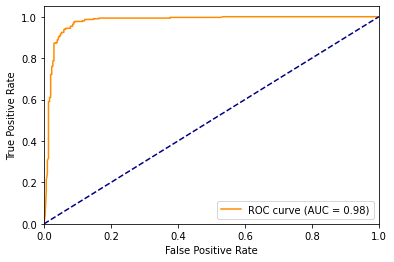

In [4]:
%pylab inline

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

print(eval_recoder.result_map['score_map'])

y_true = eval_recoder.result_map['input_labels']
y_pred = eval_recoder.result_map['output_labels']
y_prob = eval_recoder.result_map['output_probs']

print('y_true: %s' % y_true)
print('y_pred: %s' % y_pred)
print('y_prob: %s' % y_prob)

fpr, tpr, _ = roc_curve(y_true, y_prob)
score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [50]:
import numpy as np
from tcrbert.dataset import CN

n_layers = model.config.num_hidden_layers
n_data = len(eval_ds)
n_heads = model.config.num_attention_heads
max_len = eval_ds.max_len

eval_df = eval_ds.df_enc

attentions = eval_recoder.result_map['attentions']
# attentions.shape: (n_layers, n_data, n_heads, max_len, max_len)
print('attentions.shape: %s' % str(attentions.shape))

# print('eval_df.label: %s' % eval_df[CN.label])
pos_indices = np.where(eval_df[CN.label] == 1)[0]
neg_indices = np.where(eval_df[CN.label] == 0)[0]

print('pos_indices: %s(%s)' % (pos_indices, str(pos_indices.shape)))
print('neg_indices: %s(%s)' % (neg_indices, str(neg_indices.shape)))

pos_cdr3b = eval_df[CN.cdr3b].values[pos_indices]
neg_cdr3b = eval_df[CN.cdr3b].values[neg_indices]


print('pos_cdr3b: %s, neg_cdr3b: %s' % (pos_cdr3b, neg_cdr3b))
pos_attns = attentions[:, pos_indices]
neg_attns = attentions[:, neg_indices]

print('pos_attns.shape: %s, neg_attns.shape: %s' % (str(pos_attns.shape), str(neg_attns.shape)))


attentions.shape: (12, 610, 12, 40, 40)
eval_df.label: YLQPRTFLL_CASSFQNTGELFF           1
YLQPRTFLL_CASSSVNNNEQFF           1
YLQPRTFLL_CAVGEANTGELFF           1
YLQPRTFLL_CAYQEVNTGELFF           1
YLQPRTFLL_CSARDDQAVNTGELFF        1
YLQPRTFLL_CSAGQRNTGELFF           1
YLQPRTFLL_CASSLEIEAFF             1
YLQPRTFLL_CAGDYLNTGELFF           1
YLQPRTFLL_CASSPDIACTF             1
YLQPRTFLL_CASSVDNTGELFF           1
YLQPRTFLL_CASSPDIEAFF             1
YLQPRTFLL_CAGQDLNTGELFF           1
YLQPRTFLL_CASSPDIVAFF             1
YLQPRTFLL_CAAQNLNTGELFF           1
YLQPRTFLL_CASSLDIEAFF             1
YLQPRTFLL_CSAGDRNTGELFF           1
YLQPRTFLL_CSARGGQGQNTGELFF        1
YLQPRTFLL_CASSPDIEQYF             1
YLQPRTFLL_CASTDLNTGELFF           1
YLQPRTFLL_CASSELNTGELFF           1
YLQPRTFLL_CATQDVNTGELFF           1
YLQPRTFLL_CASSDLSTGELFF           1
YLQPRTFLL_CASSDLNSGEQYF           1
YLQPRTFLL_CANQDSNTGELFF           1
YLQPRTFLL_CASGDLSSGEQYF           1
YLQPRTFLL_CASSDQNGNIQYF           1
YLQPRTFLL

pos_attns.shape: (12, 305, 12, 40, 40), neg_attns.shape: (12, 305, 12, 40, 40)


2021-09-16 04:18:33 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
2021-09-16 04:18:33 [DEBUG]: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f328f8ad9d0>
2021-09-16 04:18:33 [DEBUG]: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f328f8ad9d0> on colorbar
2021-09-16 04:18:33 [DEBUG]: Setting pcolormesh
2021-09-16 04:18:33 [DEBUG]: locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f328f7ecb90>
2021-09-16 04:18:33 [DEBUG]: Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f328f7ecb90> on colorbar
2021-09-16 04:18:33 [DEBUG]: Setting pcolormesh


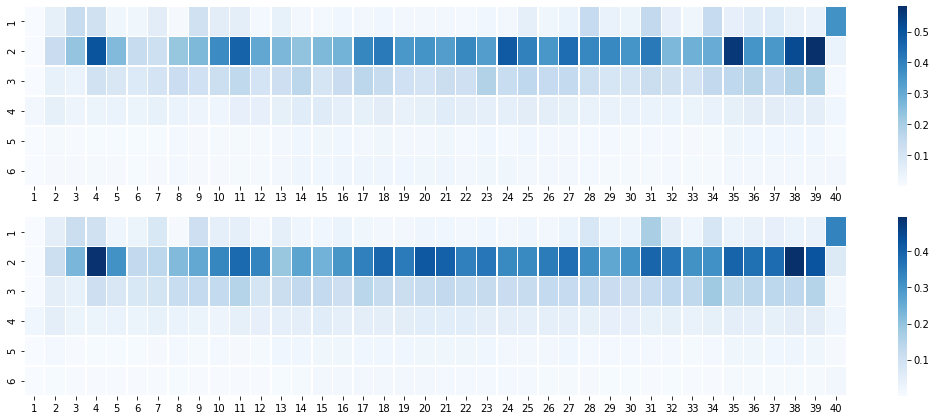

In [49]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns


def show_attentions(pos_attns=None, neg_attns=None):
    fig, axes = plt.subplots(nrows=2, ncols=1)
    fig.set_figwidth(15)
    fig.set_figheight(6)
    plt.tight_layout(h_pad=1)

    # pos_attns[-6:].shape
    sub_pos_attns = np.median(pos_attns[-6:, :, :, :, 0], axis=(1, 2))
    sub_neg_attns = np.median(neg_attns[-6:, :, :, :, 0], axis=(1, 2))

    # display(sub_pos_attns)

    g = sns.heatmap(sub_pos_attns, ax=axes[0], linewidths=.4, cmap='Blues')
    g.set_xticklabels(range(1, 41))
    g.set_yticklabels(range(1, 7))

    g = sns.heatmap(sub_neg_attns, ax=axes[1], linewidths=.4, cmap='Blues')
    g.set_xticklabels(range(1, 41))
    g.set_yticklabels(range(1, 7))

show_attentions(pos_attns=pos_attns, neg_attns=neg_attns)

2021-09-15 18:10:09 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:>

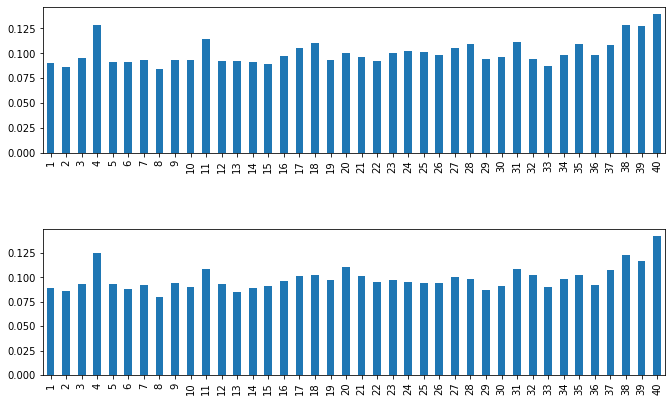

In [68]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=1)
plt.tight_layout(h_pad=3)

p_pos_attns = pos_attns.mean(axis=(0, 1, 2))
p_neg_attns = neg_attns.mean(axis=(0, 1, 2))

data = pd.Series(p_pos_attns[:, 0])
data.index = range(1, 41)
data.plot(kind='bar', ax=axes[0], figsize=(10, 6))

data = pd.Series(p_neg_attns[:, 0])
data.index = range(1, 41)
data.plot(kind='bar', ax=axes[1], figsize=(10, 6))

# sns.barplot(x=range(40), y=p_pos_attns[0], ax=axes[0])
# sns.heatmap(data=lxh_pos_attns, ax=axes[0], cmap='Blues')

np.max(eval_df[CN.cdr3b].str.len())